### IMPORTACIÓN E INSTALACIÓN DE LIBRERIAS

In [ ]:
import requests
import pydot
from google.colab import files

# Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt

# Manipulación de Datos
import pandas as pd
import numpy as np
!pip install minepy
from minepy import MINE

# Keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Sklearn
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import RegressorChain
from sklearn.svm import SVR

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.0/497.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for minepy: filename=minepy-1.2.6-cp310-cp310-linux_x86_64.whl size=187094 sha256=4fdda0b714ab37ea312647339d99a9cb7ddd271d606dae86d07163cd3e1f8caa
  Stored in directory: /root/.cache/pip/wheels/69/38/a6/825bb9b9ed81e6af43a0ef80c7cfe4cafcfdbc2f5cde2959d9
Successfully built minepy


### CARGA DEL DATASET

In [ ]:
#Leemos el archivo excel con los datos de los rendimientos
df = pd.read_excel("/DATASET YIELDS TOOL CON OUTLIERS.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Y1,Y2,Y3,Y4
0,335.299988,358.000000,382.100006,397.500000,410.399994,420.899994,434.299988,444.600006,458.899994,479.100006,498.299988,3.695,359.500000,3.023,4.100,6.276,0.202524,0.201613,0.298274,0.299639
1,335.399994,357.200012,380.500000,395.799988,408.899994,419.399994,432.899994,443.000000,457.200012,477.000000,500.500000,3.712,358.200012,2.968,4.124,6.371,0.185015,0.216186,0.315554,0.276078
2,333.200012,354.899994,378.399994,393.700012,407.100006,417.500000,431.000000,441.200012,455.299988,475.700012,495.799988,3.681,360.899994,3.081,4.177,6.334,0.200409,0.225397,0.297571,0.266754
3,333.500000,355.600006,379.100006,394.600006,408.000000,418.700012,431.399994,441.500000,455.399994,474.700012,499.000000,3.631,363.100006,3.088,4.180,6.344,0.223730,0.215946,0.314872,0.244118
4,347.500000,367.899994,388.299988,402.700012,415.799988,426.299988,438.799988,450.000000,464.299988,485.799988,501.200012,3.972,358.399994,3.004,4.205,6.325,0.156111,0.234368,0.299718,0.341429


In [ ]:
# Buscamos valores nulos
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      363 non-null    float64
 1   X2      363 non-null    float64
 2   X3      363 non-null    float64
 3   X4      363 non-null    float64
 4   X5      363 non-null    float64
 5   X6      363 non-null    float64
 6   X7      363 non-null    float64
 7   X8      363 non-null    float64
 8   X9      363 non-null    float64
 9   X10     363 non-null    float64
 10  X11     363 non-null    float64
 11  X12     363 non-null    float64
 12  X13     363 non-null    float64
 13  X14     363 non-null    float64
 14  X15     363 non-null    float64
 15  X16     363 non-null    float64
 16  Y1      363 non-null    float64
 17  Y2      363 non-null    float64
 18  Y3      363 non-null    float64
 19  Y4      363 non-null    float64
dtypes: float64(20)
memory usage: 56.8 KB


X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
Y1     0
Y2     0
Y3     0
Y4     0
dtype: int64

### ANÁLISIS EXPLORATORIO DE DATOS



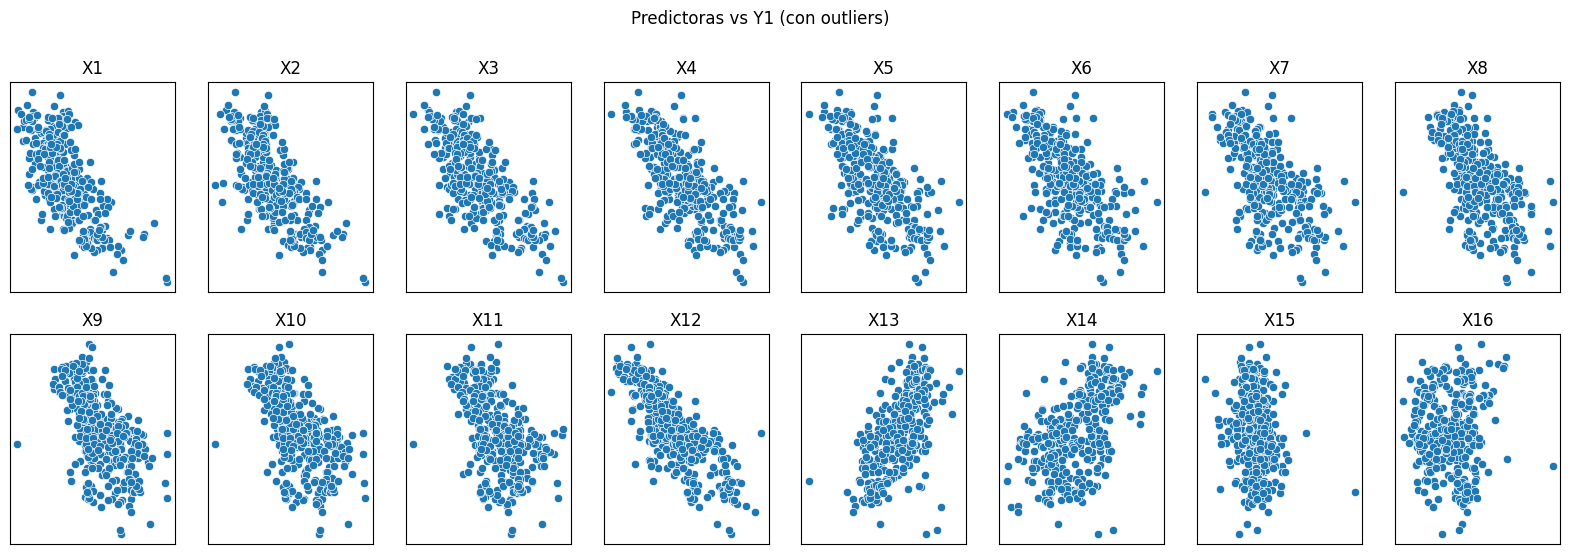

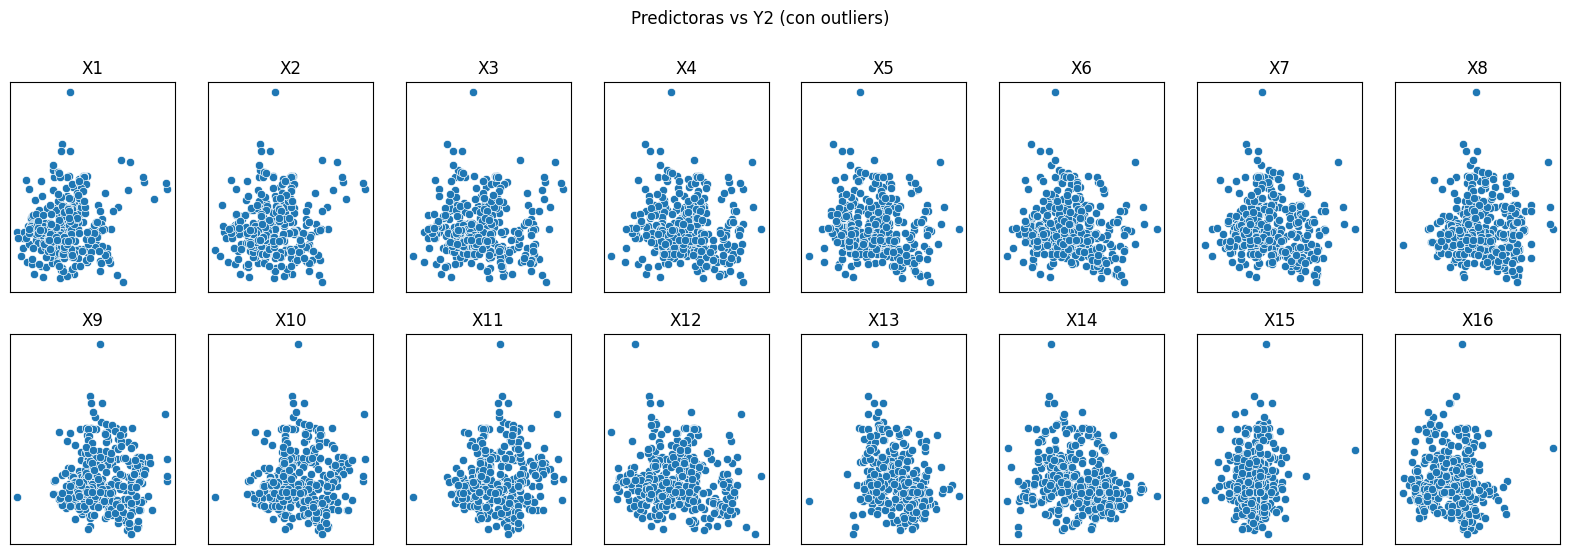

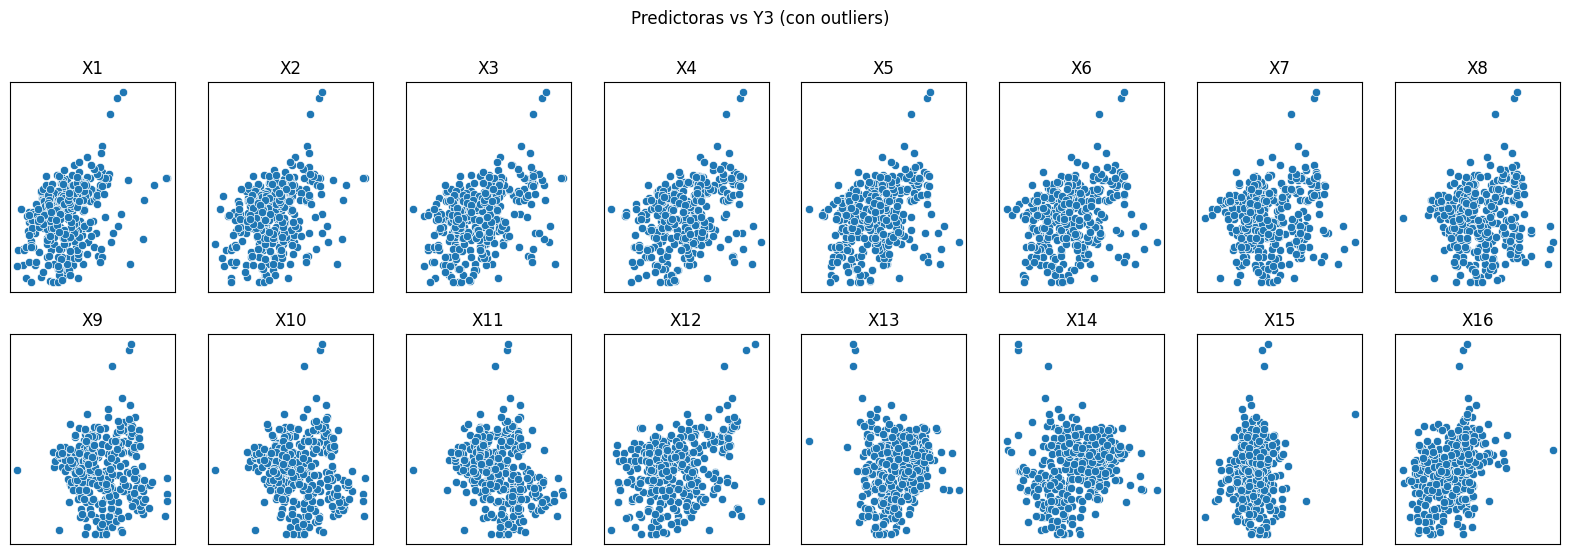

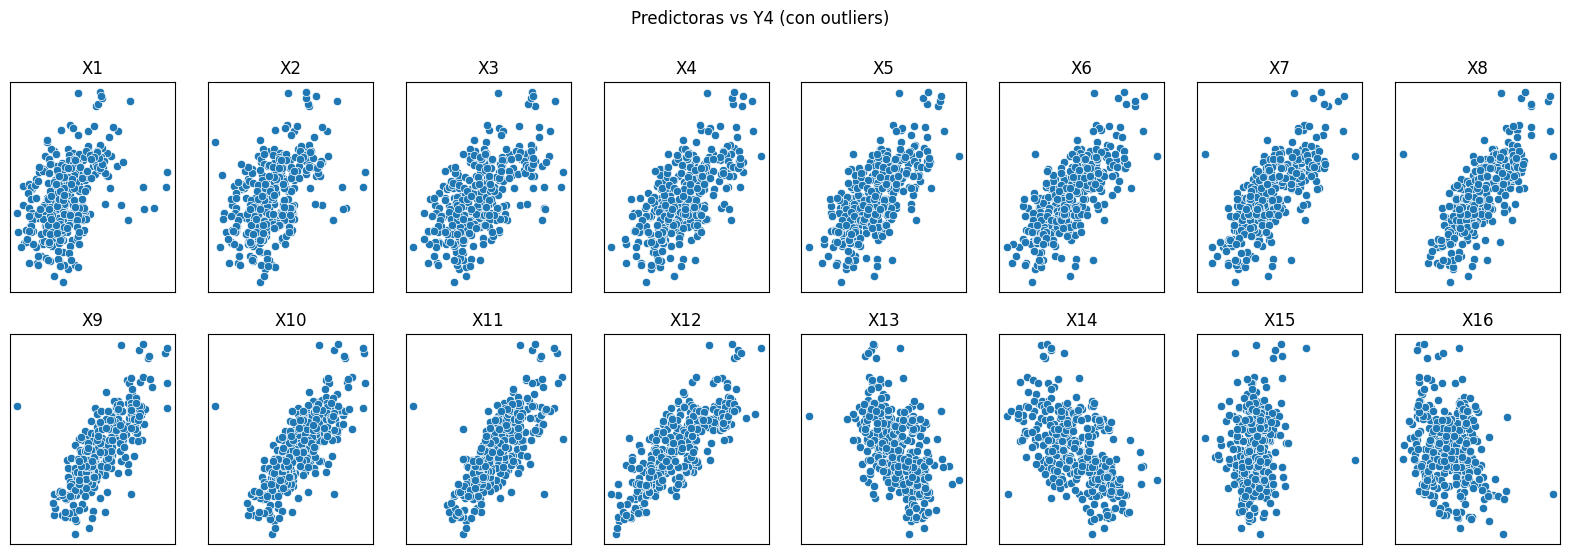

In [ ]:
# Crear subplots para cada variable objetivo
for target in target_vars:
    fig, axes = plt.subplots(2, 8, figsize=(20, 6))
    axes = axes.flatten()

    for i, feature in enumerate(feature_vars):
        sns.scatterplot(x=df[feature], y=df[target], ax=axes[i])
        axes[i].set_title(f'{feature}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].set_xticks([])
        axes[i].set_yticks([])

    # Eliminar ejes vacíos
    for j in range(len(feature_vars), len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(f'Predictoras vs {target} (con outliers)', y=1)
    plt.show()

**ELIMINAMOS LOS OUTLIERS DETECTADOS DEL DATASET**

In [ ]:
#Leemos el archivo excel con los datos de los rendimientos
df = pd.read_excel("/DATASET YIELDS TOOL SIN OUTLIERS.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Y1,Y2,Y3,Y4
0,335.299988,358.000000,382.100006,397.500000,410.399994,420.899994,434.299988,444.600006,458.899994,479.100006,498.299988,3.695,359.500000,3.023,4.100,6.276,0.202524,0.201613,0.298274,0.299639
1,335.399994,357.200012,380.500000,395.799988,408.899994,419.399994,432.899994,443.000000,457.200012,477.000000,500.500000,3.712,358.200012,2.968,4.124,6.371,0.185015,0.216186,0.315554,0.276078
2,333.200012,354.899994,378.399994,393.700012,407.100006,417.500000,431.000000,441.200012,455.299988,475.700012,495.799988,3.681,360.899994,3.081,4.177,6.334,0.200409,0.225397,0.297571,0.266754
3,333.500000,355.600006,379.100006,394.600006,408.000000,418.700012,431.399994,441.500000,455.399994,474.700012,499.000000,3.631,363.100006,3.088,4.180,6.344,0.223730,0.215946,0.314872,0.244118
4,347.500000,367.899994,388.299988,402.700012,415.799988,426.299988,438.799988,450.000000,464.299988,485.799988,501.200012,3.972,358.399994,3.004,4.205,6.325,0.156111,0.234368,0.299718,0.341429


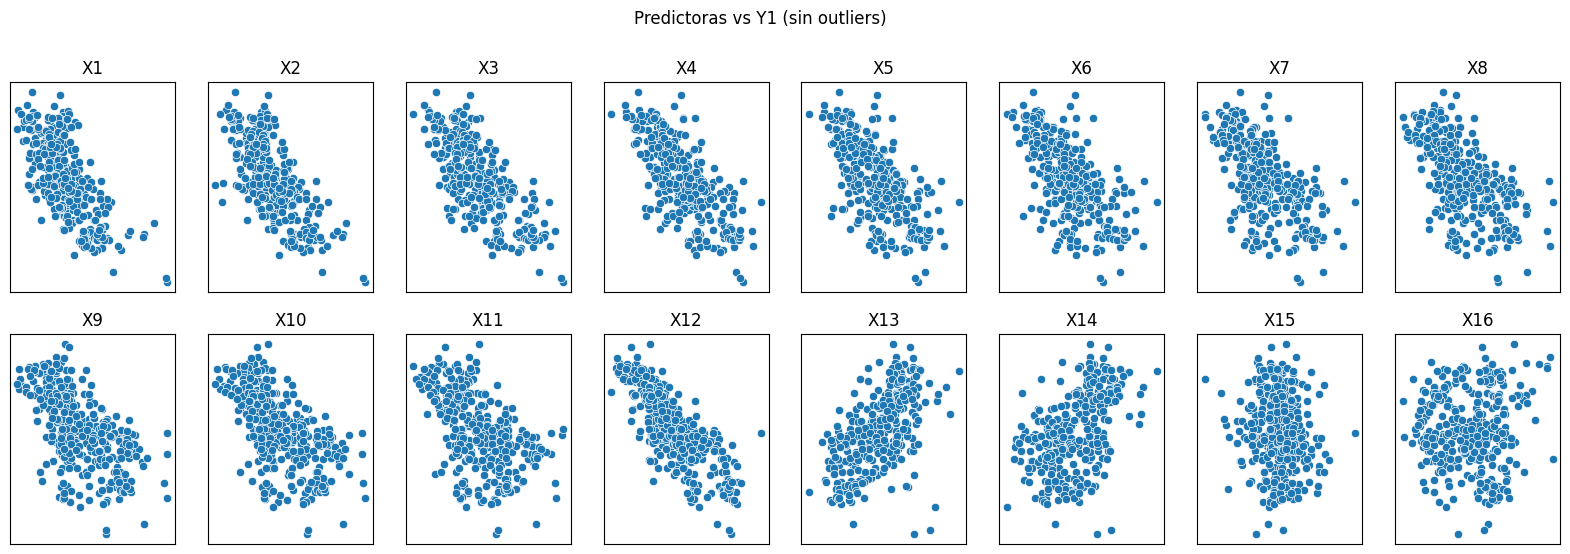

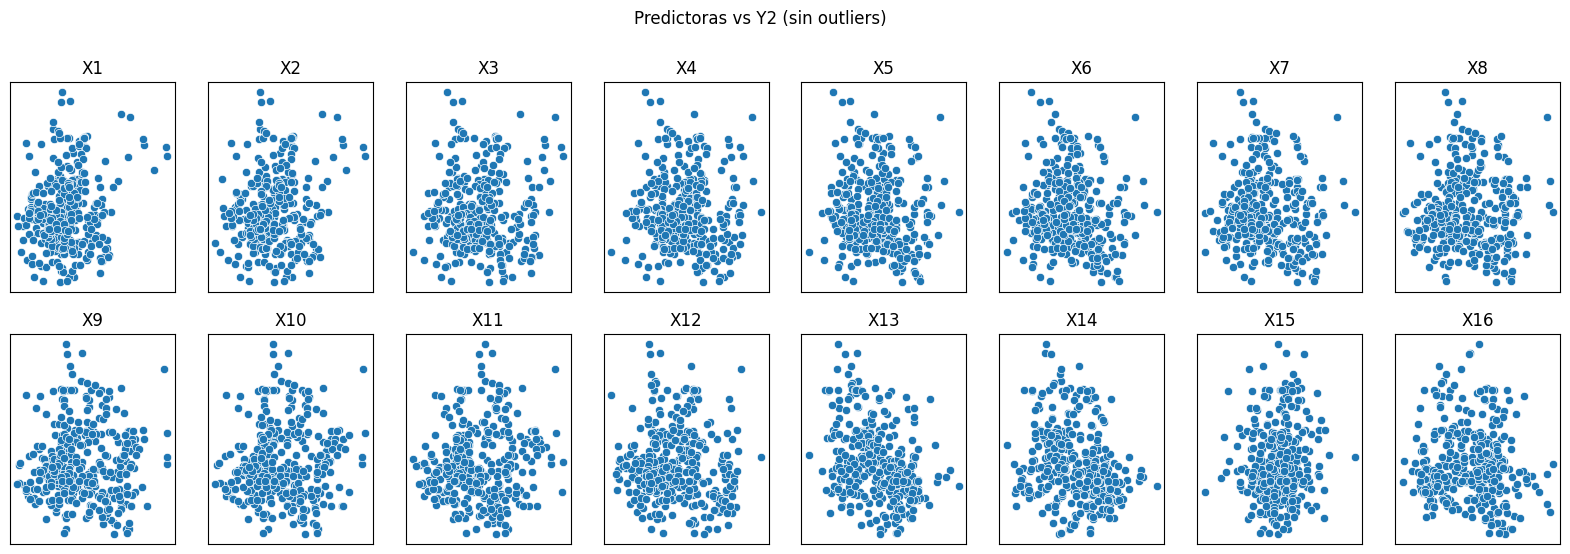

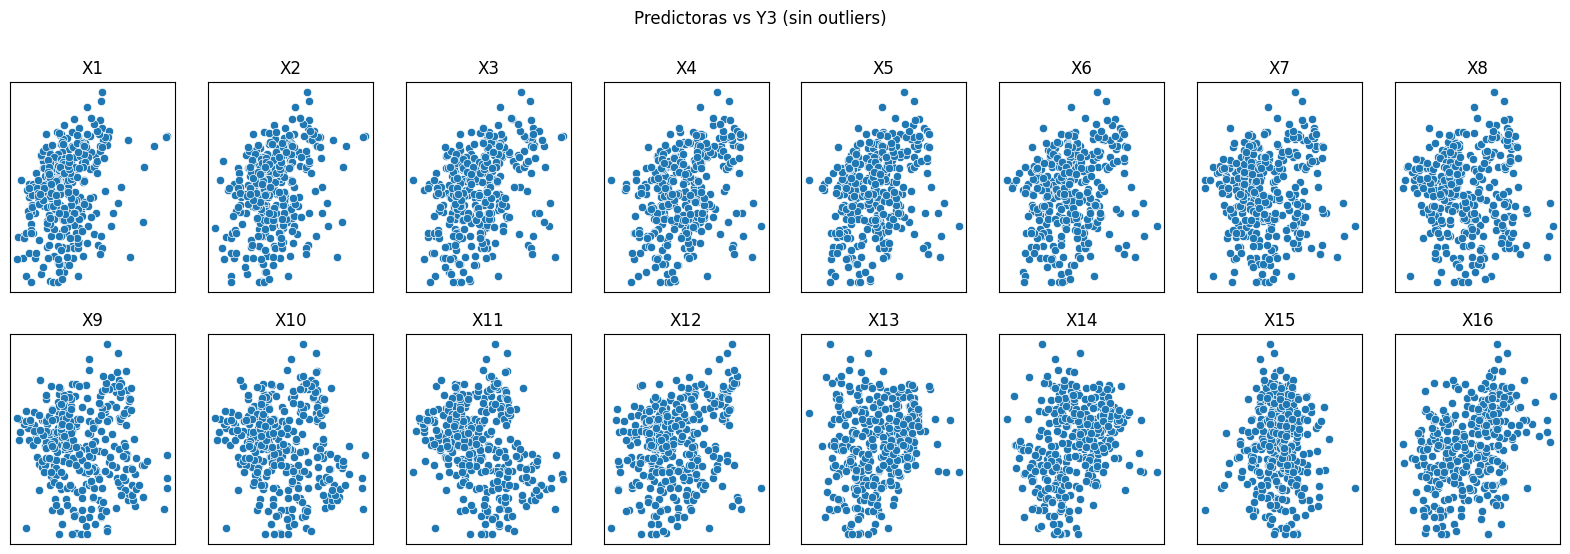

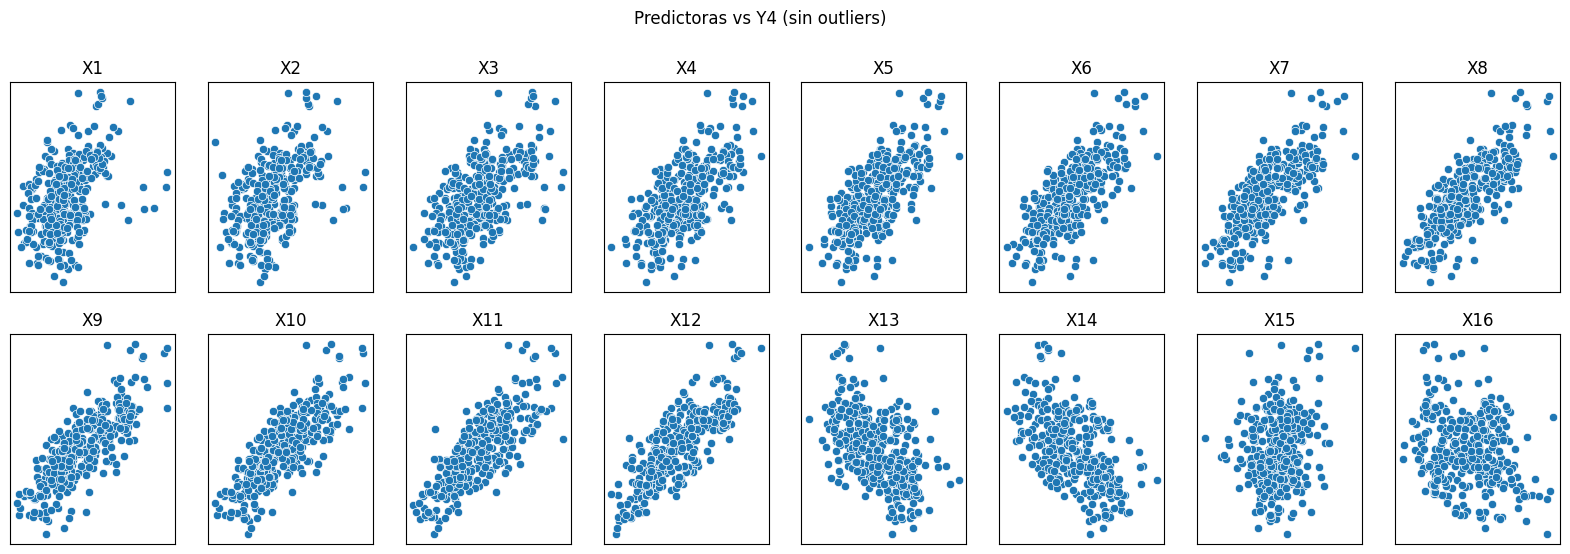

In [ ]:
# Crear subplots para cada variable objetivo
for target in target_vars:
    fig, axes = plt.subplots(2, 8, figsize=(20, 6))
    axes = axes.flatten()

    for i, feature in enumerate(feature_vars):
        sns.scatterplot(x=df[feature], y=df[target], ax=axes[i])
        axes[i].set_title(f'{feature}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].set_xticks([])
        axes[i].set_yticks([])

    # Eliminar ejes vacíos
    for j in range(len(feature_vars), len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(f'Predictoras vs {target} (sin outliers)', y=1)
    plt.show()

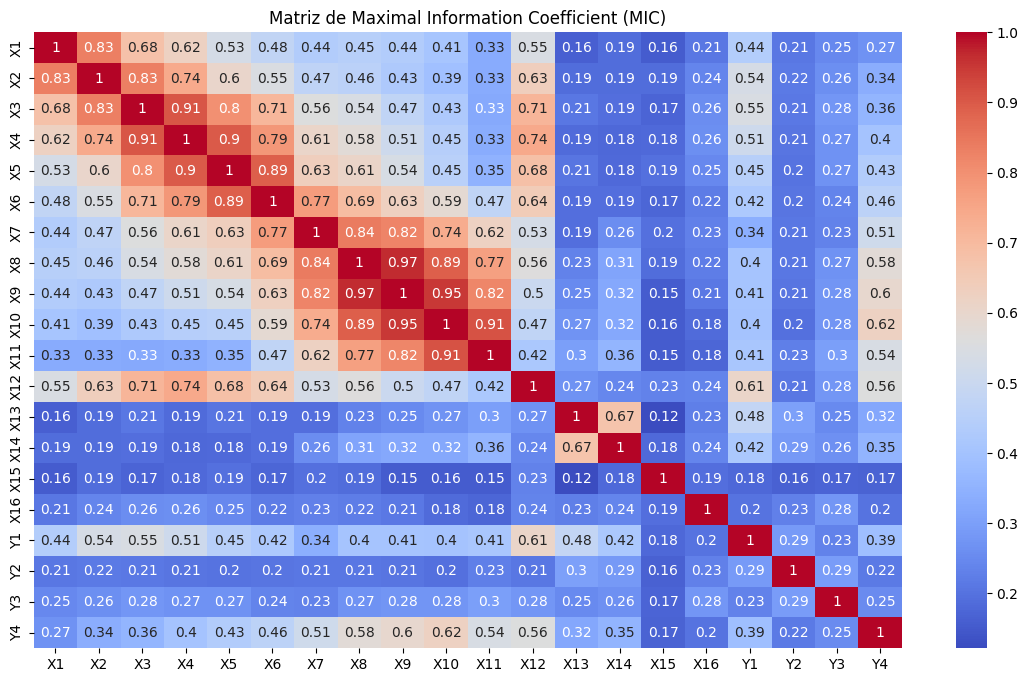

In [ ]:
# Inicializar la matriz de MIC
mic_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

# Inicializar el objeto MINE
mine = MINE()

# Calcular MIC entre cada par de variables
for i in range(df.shape[1]):
    for j in range(i, df.shape[1]):
        if i == j:
            mic_matrix.iloc[i, j] = 1.0
        else:
            mine.compute_score(df.iloc[:, i], df.iloc[:, j])
            mic = mine.mic()
            mic_matrix.iloc[i, j] = mic
            mic_matrix.iloc[j, i] = mic

# Convertir los valores de la matriz a float
mic_matrix = mic_matrix.astype(float)

# Visualizar la matriz de MIC
plt.figure(figsize=(14, 8))
sns.heatmap(mic_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Maximal Information Coefficient (MIC)')
plt.show()

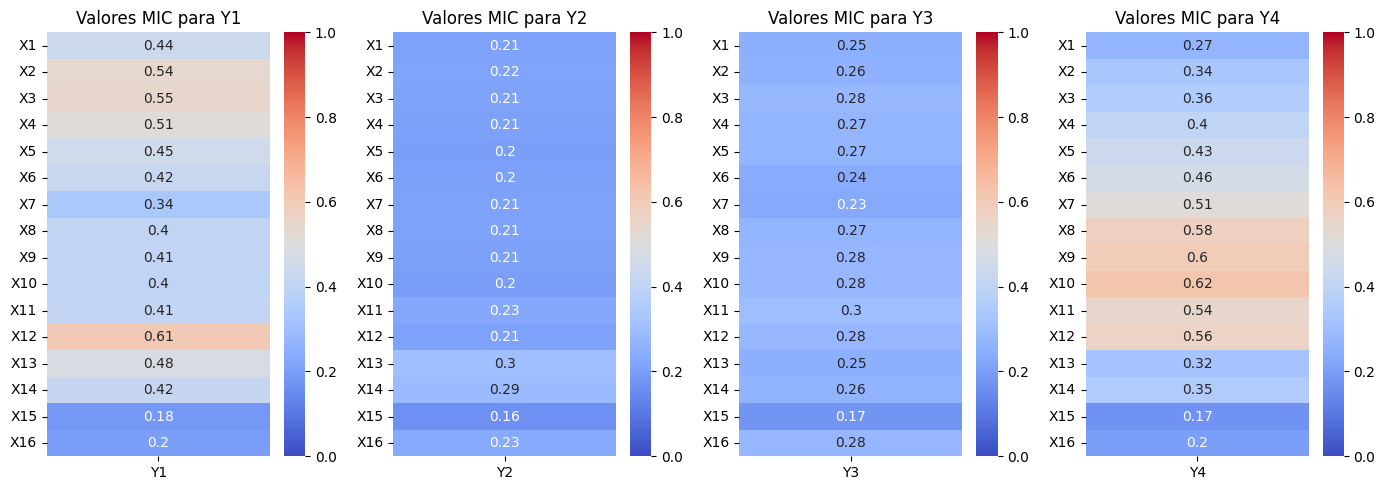

In [ ]:
# Lista de variables objetivo
target_vars = ['Y1', 'Y2', 'Y3', 'Y4']
feature_vars = df.drop(columns=target_vars).columns

# Función para calcular MIC
def calculate_mic(df, feature_vars, target_var):
    mic_values = []
    mine = MINE()

    for feature in feature_vars:
        mine.compute_score(df[feature], df[target_var])
        mic = mine.mic()
        mic_values.append(mic)

    mic_df = pd.DataFrame(data=mic_values, index=feature_vars, columns=[target_var])
    return mic_df

# Crear subplots
fig, axes = plt.subplots(1, 4, figsize=(14, 5))

# Iterar sobre las variables objetivo y los subplots
for i, target in enumerate(target_vars):
    mic_df = calculate_mic(df, feature_vars, target)
    ax = axes[i]
    sns.heatmap(mic_df, annot=True, cmap='coolwarm', vmin=0, vmax=1, ax=ax)
    ax.set_title(f'Valores MIC para {target}')

plt.tight_layout()
plt.show()

### ENTRENAMIENTO RED NEURONAL

**DEFINICION DE LA ARQUITECTURA DE LA RED NEURONAL**

In [ ]:
def create_model(input_shape):
    input_layer = Input(shape=(input_shape,))
    dense_layer_1 = Dense(units=512, activation="relu", kernel_regularizer=l2(0.000001))(input_layer)
    dense_layer_2 = Dense(units=512, activation="relu", kernel_regularizer=l2(0.000001))(dense_layer_1)
    dense_layer_3 = Dense(units=512, activation="relu", kernel_regularizer=l2(0.000001))(dense_layer_2)
    dense_layer_4 = Dense(units=512, activation="relu", kernel_regularizer=l2(0.000001))(dense_layer_3)
    dense_layer_5 = Dense(units=512, activation="relu", kernel_regularizer=l2(0.000001))(dense_layer_4)
    dropout_5 = Dropout(rate=0.2)(dense_layer_5)
    dense_layer_6 = Dense(units=512, activation="relu", kernel_regularizer=l2(0.000001))(dropout_5)
    dropout_6 = Dropout(rate=0.2)(dense_layer_6)
    dense_layer_7 = Dense(units=512, activation="relu", kernel_regularizer=l2(0.000001))(dropout_6)
    dropout_7 = Dropout(rate=0.2)(dense_layer_7)
    dense_layer_8 = Dense(units=512, activation="relu", kernel_regularizer=l2(0.000001))(dropout_7)
    dense_layer_9 = Dense(units=512, activation="relu", kernel_regularizer=l2(0.000001))(dense_layer_8)

    y_output = Dense(units=4, activation="softmax", name="y_output")(dense_layer_9)

    model = Model(inputs=input_layer, outputs=y_output)

    optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)

    model.compile(optimizer=optimizer,
                  loss={'y_output': 'mse'},
                  metrics=['MeanAbsoluteError', 'R2Score'])

    return model


**IMPLEMENTACIÓN DE LA VALIDACIÓN CRUZADA**

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores_ANN = []
r2_scores_ANN = []
models_ANN = []
histories_ANN = []
x_train_dfs_ANN = []
y_train_dfs_ANN = []
x_test_dfs_ANN = []
y_test_dfs_ANN = []
x_trains_scaled_ANN = []
x_tests_scaled_ANN = []


for train_index, val_index in kf.split(df):
    df_train, df_val = df.iloc[train_index], df.iloc[val_index]

    x_train = df_train.drop(["Y1","Y2","Y3","Y4"], axis=1)
    y_train = df_train[["Y1","Y2","Y3","Y4"]]
    x_test = df_val.drop(["Y1","Y2","Y3","Y4"], axis=1)
    y_test = df_val[["Y1","Y2","Y3","Y4"]]

    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    model = create_model(x_train.shape[1])

    # Definir early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Entrenamiento del modelo
    history = model.fit(x_train_scaled, y_train, epochs=2000, batch_size=32,
                        validation_data=(x_test_scaled, y_test), verbose=1, callbacks=[early_stopping])

    # Evaluación del modelo
    y_val_pred = model.predict(x_test_scaled)
    mae = mean_absolute_error(y_test, y_val_pred)
    r2 = r2_score(y_test, y_val_pred)

    mae_scores_ANN.append(mae)
    r2_scores_ANN.append(r2)
    models_ANN.append(model)
    histories_ANN.append(history)
    x_train_dfs_ANN.append(x_train)
    y_train_dfs_ANN.append(y_train)
    x_test_dfs_ANN.append(x_test)
    y_test_dfs_ANN.append(y_test)
    x_trains_scaled_ANN.append(x_train_scaled)
    x_tests_scaled_ANN.append(x_test_scaled)

print("MAE Scores: ", mae_scores_ANN)
print("Mean MAE Score: ", np.mean(mae_scores_ANN))
print("R2 Scores: ", r2_scores_ANN)
print("Mean R2 Score: ", np.mean(r2_scores_ANN))

**CÁLCULO DE MÉTRICAS DE LA VALIDACIÓN CRUZADA**

In [ ]:
# Inicializar listas para almacenar las métricas de cada fold
metrics = ['loss', 'mean_absolute_error', 'r2_score']
val_metrics = ['val_loss', 'val_mean_absolute_error', 'val_r2_score']

# Inicializar diccionarios para almacenar las métricas finales de cada fold
fold_metrics = {metric: [] for metric in metrics + val_metrics}

# Sumar las métricas de cada fold
for history in histories_ANN:
    for metric in metrics:
        fold_metrics[metric].append(history.history[metric][-1])
    for val_metric in val_metrics:
        fold_metrics[val_metric].append(history.history[val_metric][-1])

# Calcular las medias de cada métrica
mean_metrics = {metric: np.mean(fold_metrics[metric]) for metric in fold_metrics}
std_metrics = {metric: np.std(fold_metrics[metric]) for metric in fold_metrics}

# Crear el DataFrame para mostrar los resultados
fold_df = pd.DataFrame(fold_metrics)
mean_df = pd.DataFrame(mean_metrics, index=['Mean'])
std_df = pd.DataFrame(std_metrics, index=['Std Dev'])

# Concatenar los DataFrames
results_df = pd.concat([fold_df, mean_df, std_df])

# Mejorar la presentación del DataFrame
results_df.index = [f'Fold {i+1}' for i in range(len(histories_ANN))] + ['M', 'σ']
results_df.columns = ['Train MSE', 'Train MAE', 'Train R2',
                      'Test MSE', 'Test MAE', 'Test R2']

# Mostrar el DataFrame con formato
styled_df = results_df.style.format("{:.4f}").set_caption("Métricas Validación Cruzada").set_table_styles(
    [{'selector': 'caption',
      'props': [('font-size', '16px'), ('font-weight', 'bold')]}])

display(styled_df)

,Train MSE,Train MAE,Train R2,Test MSE,Test MAE,Test R2
Fold 1,0.0044,0.0135,0.7682,0.0044,0.0137,0.7780
Fold 2,0.0044,0.0131,0.7900,0.0045,0.0138,0.7578
Fold 3,0.0044,0.0133,0.7889,0.0044,0.0134,0.7729
Fold 4,0.0044,0.0128,0.7971,0.0044,0.0133,0.7792
Fold 5,0.0046,0.0172,0.6570,0.0045,0.0154,0.6383
M,0.0044,0.0140,0.7603,0.0044,0.0139,0.7452
σ,0.0001,0.0016,0.0525,0.0000,0.0008,0.0540


In [ ]:
histories_ANN[0].history.keys()

dict_keys(['loss', 'mean_absolute_error', 'r2_score', 'val_loss', 'val_mean_absolute_error', 'val_r2_score'])

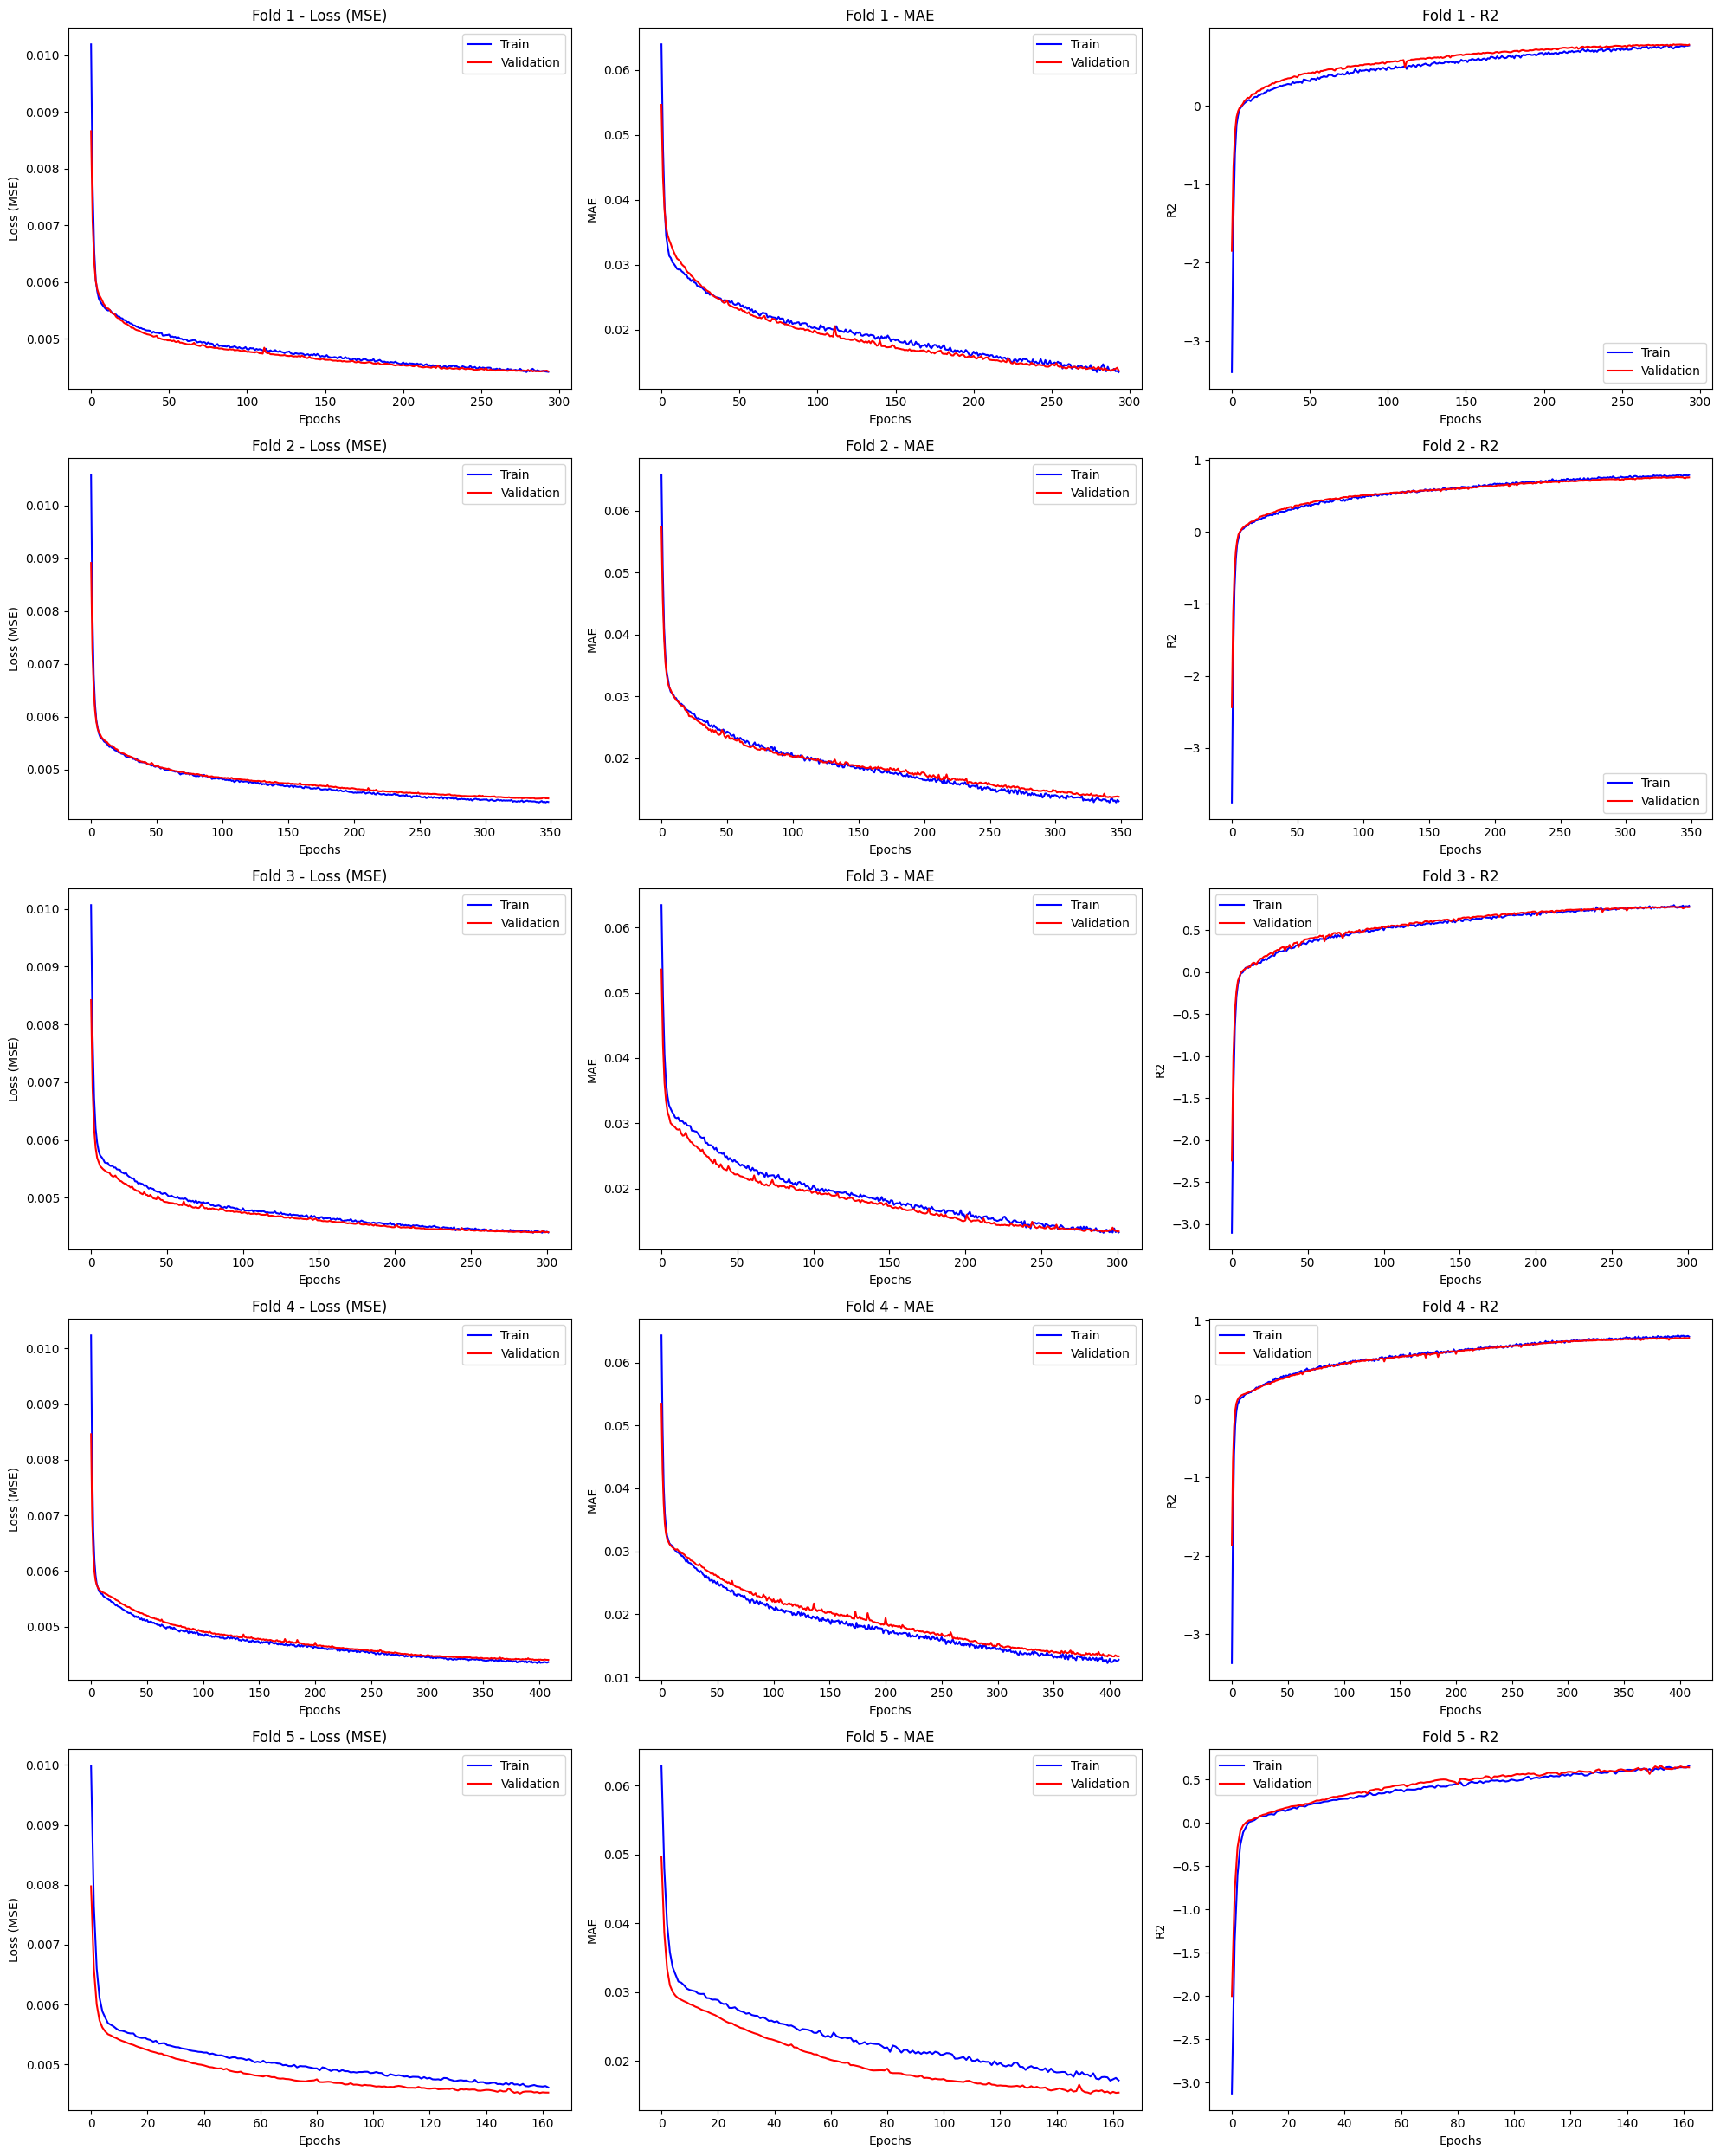

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(20, 25))  # 5 filas para los folds, 4 columnas para las métricas

metrics = ['loss', 'mean_absolute_error', 'r2_score']
val_metrics = ['val_loss', 'val_mean_absolute_error', 'val_r2_score']
metric_names = ['Loss (MSE)', 'MAE', 'R2']

# Iterar sobre cada historia y graficar las métricas
for i, history in enumerate(histories_ANN):
    for j, metric in enumerate(metrics):
        # Obtener los valores de la métrica y su validación
        train_metric = history.history[metric]
        val_metric = history.history[val_metrics[j]]

        # Graficar la métrica
        axes[i, j].plot(train_metric, label='Train', color='blue')
        axes[i, j].plot(val_metric, label='Validation', color='red')

        # Configuración de la gráfica
        axes[i, j].set_title(f'Fold {i+1} - {metric_names[j]}')
        axes[i, j].set_xlabel('Epochs')
        axes[i, j].set_ylabel(metric_names[j])
        axes[i, j].legend()

plt.tight_layout()
plt.show()

In [ ]:
best_model_ANN = models_ANN[3]
best_model_ANN.save('best_model_ANN.keras')
files.download('best_model_ANN.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### ERRORES DE LAS VARIABLES OBJETIVO

In [ ]:
y_pred = best_model_ANN.predict(x_tests_scaled_ANN[3])

3/3 [==============================] - 0s 11ms/step


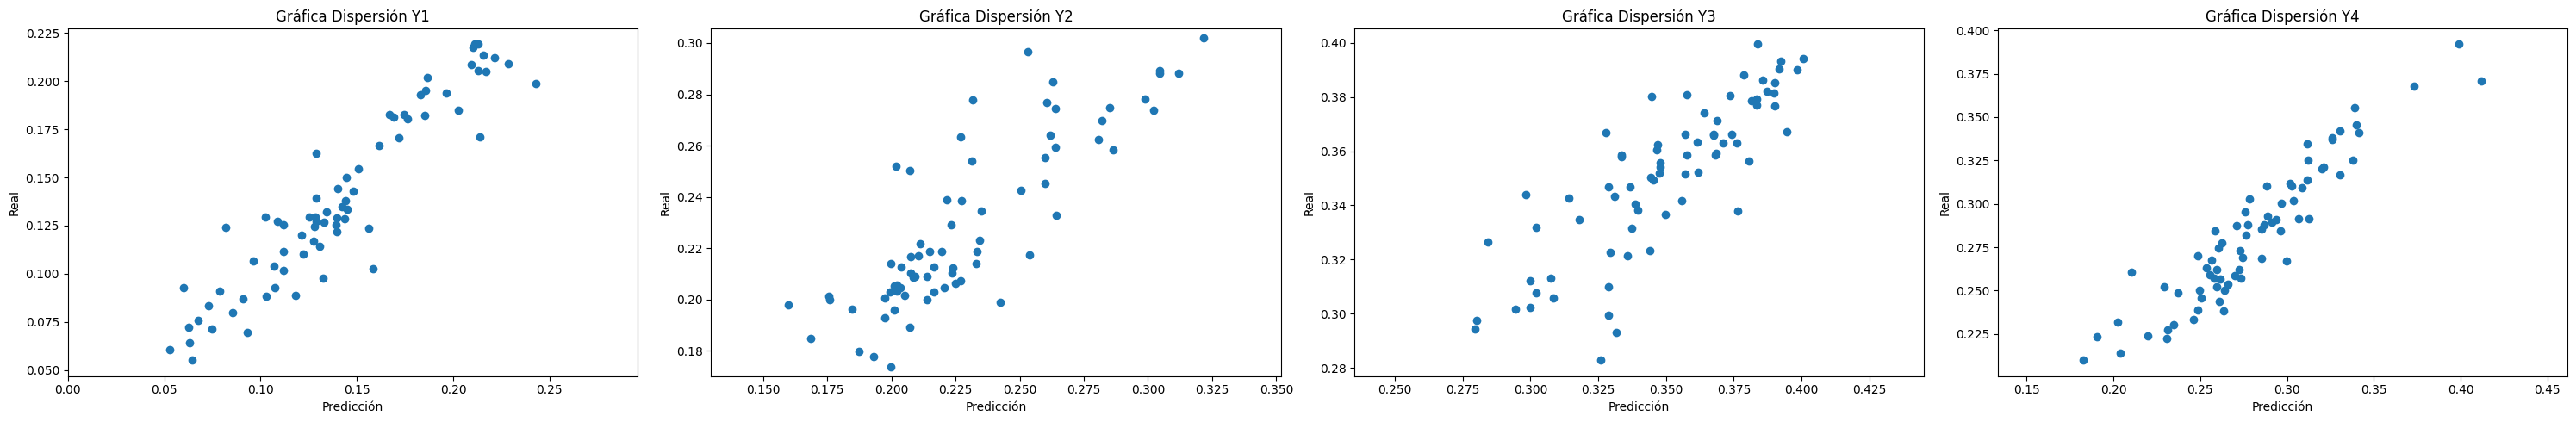

In [ ]:
pred_df = pd.DataFrame(y_pred)
test_df = pd.DataFrame(y_test_dfs_ANN[3])
pred_df.columns = test_df.columns

# Crear una figura y un conjunto de subgráficos
fig, axs = plt.subplots(1, 4, figsize=(30, 5))

# Iterar sobre las columnas y crear scatter plots
for i in range(4):
    ax = axs[i]
    ax.scatter(test_df.iloc[:, i], pred_df.iloc[:, i])
    ax.set_xlabel(f'Predicción')
    ax.set_ylabel(f'Real')
    ax.set_title(f'Gráfica Dispersión Y{i + 1}')
    ax.axis('equal')
# Ajustar el layout
plt.tight_layout()
plt.axis('equal')
# Mostrar los gráficos
plt.show()

In [ ]:
variables = test_df.columns

# Inicializar un diccionario para almacenar las métricas
metrics = {'MAE': [], 'MSE': [], 'R2': []}

for var in variables:
    y_true = test_df[var]
    y_pred = pred_df[var]

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    metrics['MAE'].append(mae)
    metrics['MSE'].append(mse)
    metrics['R2'].append(r2)

metrics_df = pd.DataFrame(metrics)
metrics_df.index = ['Y1', 'Y2', 'Y3', 'Y4']

# Mostrar el DataFrame con formato
metrics_df = metrics_df.style.set_caption("Errores de las variables objetivo").set_table_styles(
    [{'selector': 'caption',
      'props': [('font-size', '16px'), ('font-weight', 'bold')]}])

display(metrics_df)

,MAE,MSE,R2
Y1,0.012547,0.000293,0.869904
Y2,0.015230,0.000384,0.707320
Y3,0.013352,0.000313,0.676635
Y4,0.012028,0.000247,0.869247


### ENTRENAMIENTO RANDOM FOREST

In [ ]:
y = df[['Y1', 'Y2', 'Y3', 'Y4']]
X = df.drop(columns=y)

# Dividir los datos en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo
model = RandomForestRegressor(random_state=42)

# Definir los parámetros a explorar
param_grid = {
    'n_estimators': [100,200,400],
    'max_depth': [1,3,6],
    'min_samples_split': [4,6,10],
    'min_samples_leaf': [2,4,6],
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='neg_mean_absolute_error',
                           cv=5, n_jobs=1, verbose=1)

# Ejecutar GridSearchCV
grid_search.fit(x_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros encontrados: ", best_params)

# Evaluar el mejor modelo en el conjunto de prueba
best_model_RF = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores parámetros encontrados:  {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 200}


**Comprobamos que no haya Overfitting**

In [ ]:
# Predicciones en el conjunto de prueba
y_pred = best_model_RF.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE en el conjunto de prueba: ", mae)
print("MSE en el conjunto de prueba: ", mse)
print("R2 en el conjunto de prueba: ", r2)

# Predicciones en el conjunto de entrenamiento
y_pred_train = best_model_RF.predict(x_train)

mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("MAE en el conjunto de entrenamiento: ", mae)
print("MSE en el conjunto de entrenamiento: ", mse)
print("R2 en el conjunto de entrenamiento: ", r2)

MAE en el conjunto de prueba:  0.015819150210538653
MSE en el conjunto de prueba:  0.0004498450515430408
R2 en el conjunto de prueba:  0.7154923594920234
MAE en el conjunto de entrenamiento:  0.010179448185971031
MSE en el conjunto de entrenamiento:  0.00018912395587164388
R2 en el conjunto de entrenamiento:  0.8663378284370421


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores_test_RF = []
mse_scores_test_RF = []
r2_scores_test_RF = []
mae_scores_train_RF = []
mse_scores_train_RF = []
r2_scores_train_RF = []
models_RF = []
x_train_dfs_RF = []
y_train_dfs_RF = []
x_test_dfs_RF = []
y_test_dfs_RF = []


# Configurar el modelo con los mejores parámetros encontrados en el GridSearchCV
best_params = {
    'n_estimators': 100,
    'max_depth': 6,
    'min_samples_split': 4,
    'min_samples_leaf': 2,
}


kf = KFold(n_splits=5, shuffle=True, random_state=12)

for train_index, val_index in kf.split(df):
    df_train, df_val = df.iloc[train_index], df.iloc[val_index]

    model = RandomForestRegressor(**best_params, random_state=10)

    x_train = df_train.drop(["Y1","Y2","Y3","Y4"], axis=1)
    y_train = df_train[["Y1","Y2","Y3","Y4"]]
    x_test = df_val.drop(["Y1","Y2","Y3","Y4"], axis=1)
    y_test = df_val[["Y1","Y2","Y3","Y4"]]


    model.fit(x_train, y_train)

    y_pred_test = model.predict(x_test)

    row_sums_test = y_pred_test.sum(axis=1, keepdims=True)
    y_pred_test_normalized = y_pred_test / row_sums_test

    mae_test = mean_absolute_error(y_test, y_pred_test_normalized)
    mse_test = mean_squared_error(y_test, y_pred_test_normalized)
    r2_test = r2_score(y_test, y_pred_test_normalized)


    y_pred_train = model.predict(x_train)

    # Aplicar la función de normalización a cada array en el DataFrame
    # Calcular la suma de cada fila
    row_sums_train = y_pred_train.sum(axis=1, keepdims=True)

    # Dividir cada elemento por la suma de su fila
    y_pred_train_normalized = y_pred_train / row_sums_train


    # Evaluar el modelo
    mae_train = mean_absolute_error(y_train, y_pred_train_normalized)
    mse_train = mean_squared_error(y_train, y_pred_train_normalized)
    r2_train = r2_score(y_train, y_pred_train_normalized)

    mae_scores_test_RF.append(mae_test)
    mse_scores_test_RF.append(mse_test)
    r2_scores_test_RF.append(r2_test)
    mae_scores_train_RF.append(mae_train)
    mse_scores_train_RF.append(mse_train)
    r2_scores_train_RF.append(r2_train)
    models_RF.append(model)
    x_train_dfs_RF.append(x_train)
    y_train_dfs_RF.append(y_train)
    x_test_dfs_RF.append(x_test)
    y_test_dfs_RF.append(y_test)

In [ ]:
# Crear un DataFrame con los datos
data = {
    'Train MSE': mse_scores_train_RF + [np.mean(mse_scores_train_RF), np.std(mse_scores_train_RF)],
    'Train MAE': mae_scores_train_RF + [np.mean(mae_scores_train_RF), np.std(mae_scores_train_RF)],
    'Train R2': r2_scores_train_RF + [np.mean(r2_scores_train_RF), np.std(r2_scores_train_RF)],
    'Test MSE': mse_scores_test_RF + [np.mean(mse_scores_test_RF), np.std(mse_scores_test_RF)],
    'Test MAE': mae_scores_test_RF + [np.mean(mae_scores_test_RF), np.std(mae_scores_test_RF)],
    'Test R2': r2_scores_test_RF + [np.mean(r2_scores_test_RF), np.std(r2_scores_test_RF)]
}

data_df = pd.DataFrame(data)
data_df.index = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5', 'M', 'σ']

# Formatear y mostrar el DataFrame con estilo
styled_df = data_df.style.format({
    'Train MSE': "{:.4f}",
    'Train MAE': "{:.4f}",
    'Train R2': "{:.4f}",
    'Test MSE': "{:.4f}",
    'Test MAE': "{:.4f}",
    'Test R2': "{:.4f}"
}).set_caption("Métricas Validación Cruzada").set_table_styles(
    [{'selector': 'caption',
      'props': [('font-size', '16px'), ('font-weight', 'bold')]}])

display(styled_df)

,Train MSE,Train MAE,Train R2,Test MSE,Test MAE,Test R2
Fold 1,0.0002,0.0104,0.8752,0.0004,0.0144,0.7130
Fold 2,0.0002,0.0104,0.8653,0.0005,0.0160,0.6861
Fold 3,0.0002,0.0105,0.8700,0.0003,0.0143,0.7117
Fold 4,0.0002,0.0102,0.8741,0.0005,0.0167,0.5915
Fold 5,0.0002,0.0100,0.8691,0.0006,0.0171,0.6995
M,0.0002,0.0103,0.8708,0.0005,0.0157,0.6804
σ,0.0000,0.0002,0.0036,0.0001,0.0011,0.0455


In [ ]:
best_model_RF = models_RF[2]

In [ ]:
y_pred = best_model_RF.predict(x_test_dfs_RF[2])
# Aplicar la función de normalización a cada array en el DataFrame
# Calcular la suma de cada fila
row_sums = y_pred.sum(axis=1, keepdims=True)

# Dividir cada elemento por la suma de su fila
y_pred_normalized = y_pred / row_sums

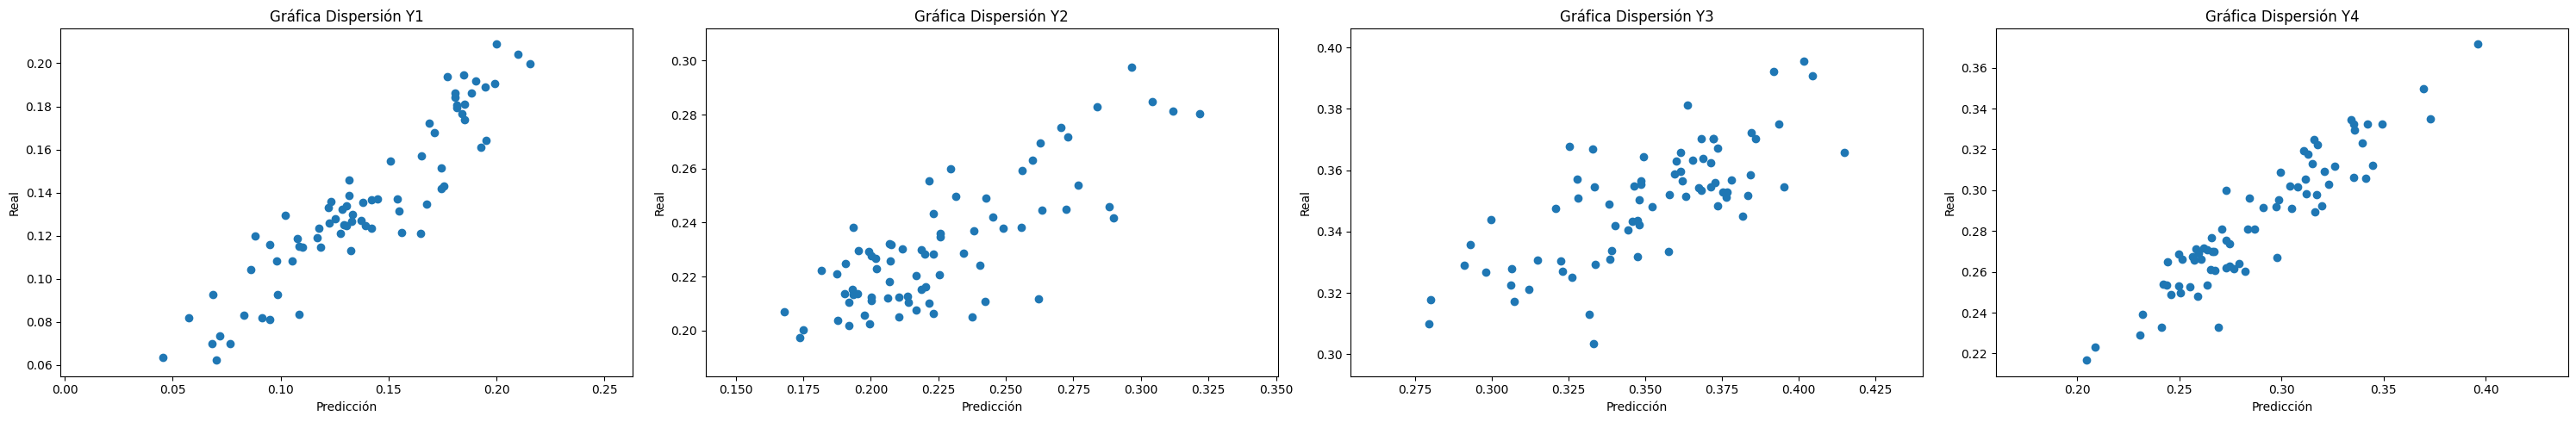

In [ ]:
pred_df = pd.DataFrame(y_pred_normalized)
test_df = pd.DataFrame(y_test_dfs_RF[2])
pred_df.columns = test_df.columns

# Crear una figura y un conjunto de subgráficos
fig, axs = plt.subplots(1, 4, figsize=(30, 5))

# Iterar sobre las columnas y crear scatter plots
for i in range(4):
    ax = axs[i]
    ax.scatter(test_df.iloc[:, i], pred_df.iloc[:, i])
    ax.set_xlabel(f'Predicción')
    ax.set_ylabel(f'Real')
    ax.set_title(f'Gráfica Dispersión Y{i + 1}')
    ax.axis('equal')
# Ajustar el layout
plt.tight_layout()
plt.axis('equal')
# Mostrar los gráficos
plt.show()

In [ ]:
variables = test_df.columns

# Inicializar un diccionario para almacenar las métricas
metrics = {'MAE': [], 'MSE': [], 'R2': []}

for var in variables:
    y_test = test_df[var]
    y_pred_normalized = pred_df[var]

    mae = mean_absolute_error(y_test, y_pred_normalized)
    mse = mean_squared_error(y_test, y_pred_normalized)
    r2 = r2_score(y_test, y_pred_normalized)

    metrics['MAE'].append(mae)
    metrics['MSE'].append(mse)
    metrics['R2'].append(r2)

metrics_df = pd.DataFrame(metrics)
metrics_df.index = ['Y1', 'Y2', 'Y3', 'Y4']

# Mostrar el DataFrame con formato
metrics_df = metrics_df.style.set_caption("Errores de las variables objetivo").set_table_styles(
    [{'selector': 'caption',
      'props': [('font-size', '16px'), ('font-weight', 'bold')]}])

display(metrics_df)

,MAE,MSE,R2
Y1,0.011891,0.000246,0.853507
Y2,0.017630,0.000480,0.600973
Y3,0.015814,0.000410,0.546528
Y4,0.012015,0.000230,0.845784


### ENTRENAMIENTO K NEAREST NEIGHBOURS

In [ ]:
y = df[['Y1', 'Y2', 'Y3', 'Y4']]
X = df.drop(columns=y)

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Definir el modelo KNeighborsRegressor
knn = KNeighborsRegressor()

# Definir los parámetros para GridSearchCV
param_grid = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'weights': ['uniform','distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10,20,30,40,50],
    'p': [1,2],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=1, verbose=1)

# Ejecutar GridSearchCV
grid_search.fit(x_train_scaled, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros encontrados: ", best_params)

# Evaluar el mejor modelo en el conjunto de prueba
best_model_KNN = grid_search.best_estimator_

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Mejores parámetros encontrados:  {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [ ]:
# Predicciones en el conjunto de prueba
y_pred = best_model_KNN.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE en el conjunto de prueba: ", mae)
print("MSE en el conjunto de prueba: ", mse)
print("R2 en el conjunto de prueba: ", r2)

# Predicciones en el conjunto de prueba
y_pred_train = best_model_KNN.predict(x_train_scaled)

mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("MAE en el conjunto de entrenamiento: ", mae)
print("MSE en el conjunto de entrenamiento: ", mse)
print("R2 en el conjunto de entrenamiento: ", r2)

MAE en el conjunto de prueba:  0.01292769275838937
MSE en el conjunto de prueba:  0.0003341396721456853
R2 en el conjunto de prueba:  0.7695369390617137
MAE en el conjunto de entrenamiento:  0.0
MSE en el conjunto de entrenamiento:  0.0
R2 en el conjunto de entrenamiento:  1.0


**CORRECCIÓN PROBLEMAS OVERFITTING**

In [ ]:
# Definir el modelo KNeighborsRegressor con los parámetros especificados
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto',leaf_size= 10, p=1, metric='manhattan')

# Entrenar el modelo
knn.fit(x_train_scaled, y_train)

KNeighborsRegressor(leaf_size=10, metric='manhattan', p=1)

In [ ]:
# Predicciones en el conjunto de prueba
y_pred = knn.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE en el conjunto de prueba: ", mae)
print("MSE en el conjunto de prueba: ", mse)
print("R2 en el conjunto de prueba: ", r2)

# Predicciones en el conjunto de entrenamiento
y_pred_train = knn.predict(x_train_scaled)

mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("MAE en el conjunto de entrenamiento: ", mae)
print("MSE en el conjunto de entrenamiento: ", mse)
print("R2 en el conjunto de entrenamiento: ", r2)

MAE en el conjunto de prueba:  0.01478703608770276
MSE en el conjunto de prueba:  0.00039817760731824896
R2 en el conjunto de prueba:  0.7234401449871518
MAE en el conjunto de entrenamiento:  0.012117168119114615
MSE en el conjunto de entrenamiento:  0.00026843576512418105
R2 en el conjunto de entrenamiento:  0.8010375982963487


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores_test_KNN = []
mse_scores_test_KNN = []
r2_scores_test_KNN = []
mae_scores_train_KNN = []
mse_scores_train_KNN = []
r2_scores_train_KNN = []
models_KNN = []
x_train_dfs_KNN = []
y_train_dfs_KNN = []
x_test_dfs_KNN = []
y_test_dfs_KNN = []
x_trains_scaled_KNN = []
x_tests_scaled_KNN = []



# Configurar el modelo con los mejores parámetros definidos para corregir el overfitting
best_params = {
    'n_neighbors': 5,
    'weights': 'uniform',
    'algorithm': 'auto',
    'leaf_size': 10,
    'p': 1,
    'metric': 'manhattan'
}


kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(df):
    df_train, df_val = df.iloc[train_index], df.iloc[val_index]

    model = KNeighborsRegressor(**best_params)

    x_train = df_train.drop(["Y1","Y2","Y3","Y4"], axis=1)
    y_train = df_train[["Y1","Y2","Y3","Y4"]]
    x_test = df_val.drop(["Y1","Y2","Y3","Y4"], axis=1)
    y_test = df_val[["Y1","Y2","Y3","Y4"]]

    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    model.fit(x_train_scaled, y_train)

    y_pred_test = model.predict(x_test_scaled)

    # Aplicar la función de normalización a cada array en el DataFrame
    # Calcular la suma de cada fila
    row_sums_test = y_pred_test.sum(axis=1, keepdims=True)

    # Dividir cada elemento por la suma de su fila
    y_pred_test_normalized = y_pred_test / row_sums_test

    # Evaluar el modelo
    mae_test = mean_absolute_error(y_test, y_pred_test_normalized)
    mse_test = mean_squared_error(y_test, y_pred_test_normalized)
    r2_test = r2_score(y_test, y_pred_test_normalized)

    y_pred_train = model.predict(x_train_scaled)

    # Aplicar la función de normalización a cada array en el DataFrame
    # Calcular la suma de cada fila
    row_sums_train = y_pred_train.sum(axis=1, keepdims=True)

    # Dividir cada elemento por la suma de su fila
    y_pred_train_normalized = y_pred_train / row_sums_train

    # Evaluar el modelo
    mae_train = mean_absolute_error(y_train, y_pred_train_normalized)
    mse_train = mean_squared_error(y_train, y_pred_train_normalized)
    r2_train= r2_score(y_train, y_pred_train_normalized)

    mae_scores_test_KNN.append(mae_test)
    mse_scores_test_KNN.append(mse_test)
    r2_scores_test_KNN.append(r2_test)
    mae_scores_train_KNN.append(mae_train)
    mse_scores_train_KNN.append(mse_train)
    r2_scores_train_KNN.append(r2_train)
    models_KNN.append(model)
    x_train_dfs_KNN.append(x_train)
    y_train_dfs_KNN.append(y_train)
    x_test_dfs_KNN.append(x_test)
    y_test_dfs_KNN.append(y_test)
    x_trains_scaled_KNN.append(x_train_scaled)
    x_tests_scaled_KNN.append(x_test_scaled)

In [ ]:
# Crear un DataFrame con los datos
data = {
    'Train MSE': mse_scores_train_KNN + [np.mean(mse_scores_train_KNN), np.std(mse_scores_train_KNN)],
    'Train MAE': mae_scores_train_KNN + [np.mean(mae_scores_train_KNN), np.std(mae_scores_train_KNN)],
    'Train R2': r2_scores_train_KNN + [np.mean(r2_scores_train_KNN), np.std(r2_scores_train_KNN)],
    'Test MSE': mse_scores_test_KNN + [np.mean(mse_scores_test_KNN), np.std(mse_scores_test_KNN)],
    'Test MAE': mae_scores_test_KNN + [np.mean(mae_scores_test_KNN), np.std(mae_scores_test_KNN)],
    'Test R2': r2_scores_test_KNN + [np.mean(r2_scores_test_KNN), np.std(r2_scores_test_KNN)]
}

data_df = pd.DataFrame(data)
data_df.index = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5', 'M', 'σ']

# Formatear y mostrar el DataFrame con estilo
styled_df = data_df.style.format({
    'Train MAE': "{:.4f}",
    'Train MSE': "{:.4f}",
    'Train R2': "{:.4f}",
    'Test MAE': "{:.4f}",
    'Test MSE': "{:.4f}",
    'Test R2': "{:.4f}",
}).set_caption("Métricas Validación Cruzada").set_table_styles(
    [{'selector': 'caption',
      'props': [('font-size', '16px'), ('font-weight', 'bold')]}])

display(styled_df)

,Train MSE,Train MAE,Train R2,Test MSE,Test MAE,Test R2
Fold 1,0.0003,0.0126,0.7873,0.0005,0.0159,0.7052
Fold 2,0.0003,0.0125,0.8061,0.0004,0.0151,0.6963
Fold 3,0.0003,0.0126,0.8030,0.0004,0.0152,0.7102
Fold 4,0.0003,0.0124,0.7996,0.0004,0.0162,0.7136
Fold 5,0.0003,0.0125,0.8043,0.0005,0.0161,0.6466
M,0.0003,0.0125,0.8000,0.0005,0.0157,0.6944
σ,0.0000,0.0001,0.0067,0.0000,0.0005,0.0246


In [ ]:
best_model_KNN = models_KNN[1]

In [ ]:
y_pred = best_model_KNN.predict(x_tests_scaled_KNN[1])

# Aplicar la función de normalización a cada array en el DataFrame
# Calcular la suma de cada fila
row_sums = y_pred.sum(axis=1, keepdims=True)

# Dividir cada elemento por la suma de su fila
y_pred_normalized = y_pred / row_sums

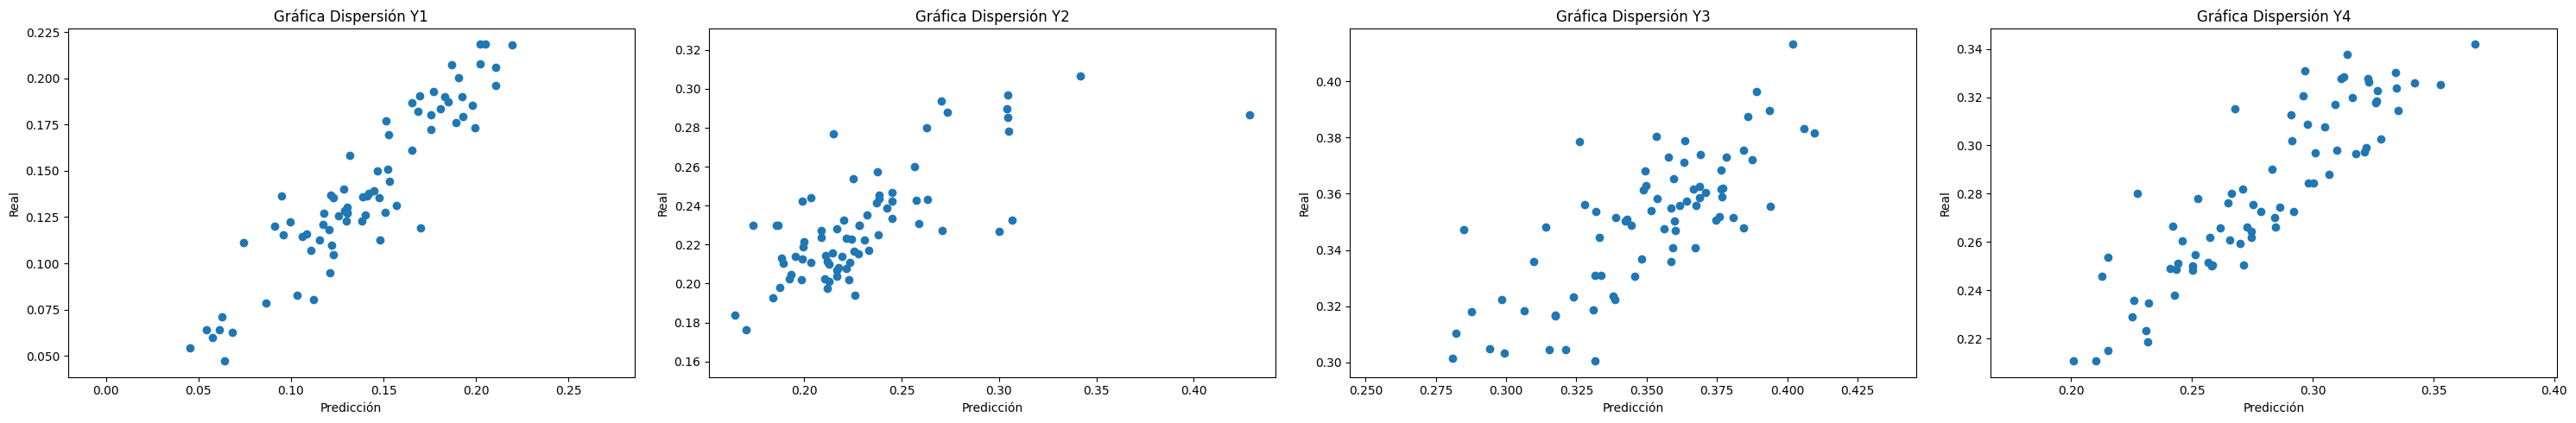

In [ ]:
pred_df = pd.DataFrame(y_pred_normalized)
test_df = pd.DataFrame(y_test_dfs_KNN[1])
pred_df.columns = test_df.columns

# Crear una figura y un conjunto de subgráficos
fig, axs = plt.subplots(1, 4, figsize=(30, 5))

# Iterar sobre las columnas y crear scatter plots
for i in range(4):
    ax = axs[i]
    ax.scatter(test_df.iloc[:, i], pred_df.iloc[:, i])
    ax.set_xlabel(f'Predicción')
    ax.set_ylabel(f'Real')
    ax.set_title(f'Gráfica Dispersión Y{i + 1}')
    ax.axis('equal')
# Ajustar el layout
plt.tight_layout()
plt.axis('equal')
# Mostrar los gráficos
plt.show()

In [ ]:
variables = test_df.columns

# Inicializar un diccionario para almacenar las métricas
metrics = {'MAE': [], 'MSE': [], 'R2': []}

for var in variables:
    y_test = test_df[var]
    y_pred_normalized = pred_df[var]

    mae = mean_absolute_error(y_test, y_pred_normalized)
    mse = mean_squared_error(y_test, y_pred_normalized)
    r2 = r2_score(y_test, y_pred_normalized)

    metrics['MAE'].append(mae)
    metrics['MSE'].append(mse)
    metrics['R2'].append(r2)

metrics_df = pd.DataFrame(metrics)
metrics_df.index = ['Y1', 'Y2', 'Y3', 'Y4']

# Mostrar el DataFrame con formato
metrics_df = metrics_df.style.set_caption("Errores de las variables objetivo").set_table_styles(
    [{'selector': 'caption',
      'props': [('font-size', '16px'), ('font-weight', 'bold')]}])

display(metrics_df)

,MAE,MSE,R2
Y1,0.012704,0.000274,0.848178
Y2,0.019084,0.000829,0.537668
Y3,0.015300,0.000371,0.598529
Y4,0.013293,0.000291,0.800853


### ENTRENAMIENTO SVR CON REGRESSOR CHAIN

In [ ]:
y = df[['Y4', 'Y1', 'Y3', 'Y2']]
X = df.drop(columns=y)

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler_X = StandardScaler()
scaler_y = StandardScaler()

x_train_scaled = scaler_X.fit_transform(x_train)
x_test_scaled = scaler_X.transform(x_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Definir el modelo base de SVR
base_model = SVR()

# Configurar GridSearchCV con RegressorChain
chain_model = RegressorChain(base_model, random_state = 42)

# Definir los parámetros para GridSearchCV
param_grid = {
    'base_estimator__kernel': ['linear','rbf', 'poly','sigmoid'],
    'base_estimator__C': [0.1,0.5,1],
    'base_estimator__epsilon': [0.01, 0.1, 1],
    'base_estimator__gamma': ['scale', 'auto']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=chain_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=1, verbose=1)

# Ejecutar GridSearchCV
grid_search.fit(x_train_scaled, y_train_scaled)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros encontrados: ", best_params)

# Evaluar el mejor modelo en el conjunto de prueba
best_model_SVR = grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores parámetros encontrados:  {'base_estimator__C': 1, 'base_estimator__epsilon': 0.1, 'base_estimator__gamma': 'scale', 'base_estimator__kernel': 'rbf'}


In [ ]:
# Predicciones en el conjunto de prueba
y_pred_scaled = best_model_SVR.predict(x_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE en el conjunto de prueba: ", mae)
print("MSE en el conjunto de prueba: ", mse)
print("R2 en el conjunto de prueba: ", r2)

# Predicciones en el conjunto de entrenamiento
y_pred_train_scaled = best_model_SVR.predict(x_train_scaled)
y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled)

mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("MAE en el conjunto de entrenamiento: ", mae)
print("MSE en el conjunto de entrenamiento: ", mse)
print("R2 en el conjunto de entrenamiento: ", r2)

MAE en el conjunto de prueba:  0.012725132752566424
MSE en el conjunto de prueba:  0.00030235694294776137
R2 en el conjunto de prueba:  0.8091360573475044
MAE en el conjunto de entrenamiento:  0.009169086367246147
MSE en el conjunto de entrenamiento:  0.00017938408337775572
R2 en el conjunto de entrenamiento:  0.870348489771468


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores_test_SVR = []
mse_scores_test_SVR = []
r2_scores_test_SVR = []
mae_scores_train_SVR = []
mse_scores_train_SVR = []
r2_scores_train_SVR = []
models_SVR = []
x_train_dfs_SVR = []
y_train_dfs_SVR = []
x_test_dfs_SVR = []
y_test_dfs_SVR = []
x_trains_scaled_SVR = []
x_tests_scaled_SVR = []
y_tests_scaled_SVR = []

# Configurar el modelo con los mejores parámetros definidos
best_params = {
    'kernel': 'rbf',
    'C': 1,
    'epsilon': 0.1,
    'gamma': 'scale'
}


kf = KFold(n_splits=5, shuffle=True, random_state = 12)

for train_index, val_index in kf.split(df):
    df_train, df_val = df.iloc[train_index], df.iloc[val_index]

    model = SVR(**best_params)
    chain_model = RegressorChain(model, random_state = 12)

    x_train = df_train.drop(["Y1","Y2","Y3","Y4"], axis=1)
    y_train = df_train[["Y1","Y2","Y3","Y4"]]
    x_test = df_val.drop(["Y1","Y2","Y3","Y4"], axis=1)
    y_test = df_val[["Y1","Y2","Y3","Y4"]]

    # Escalar las características
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    y_train_scaled = scaler_y.fit_transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    x_train_scaled = scaler_X.fit_transform(x_train)
    x_test_scaled = scaler_X.transform(x_test)

    chain_model.fit(x_train_scaled, y_train_scaled)

    y_pred_test_scaled = chain_model.predict(x_test_scaled)
    y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled)

    # Aplicar la función de normalización a cada array en el DataFrame
    # Calcular la suma de cada fila
    row_sums_test = y_pred_test.sum(axis=1, keepdims=True)

    # Dividir cada elemento por la suma de su fila
    y_pred_test_normalized = y_pred_test / row_sums_test

    # Evaluar el modelo
    mae_test = mean_absolute_error(y_test, y_pred_test_normalized)
    mse_test = mean_squared_error(y_test, y_pred_test_normalized)
    r2_test = r2_score(y_test, y_pred_test_normalized)

    y_pred_train_scaled = chain_model.predict(x_train_scaled)
    y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled)

    # Aplicar la función de normalización a cada array en el DataFrame
    # Calcular la suma de cada fila
    row_sums_train = y_pred_train.sum(axis=1, keepdims=True)

    # Dividir cada elemento por la suma de su fila
    y_pred_train_normalized = y_pred_train / row_sums_train

    # Evaluar el modelo
    mae_train = mean_absolute_error(y_train, y_pred_train_normalized)
    mse_train = mean_squared_error(y_train, y_pred_train_normalized)
    r2_train = r2_score(y_train, y_pred_train_normalized)

    mae_scores_test_SVR.append(mae_test)
    mse_scores_test_SVR.append(mse_test)
    r2_scores_test_SVR.append(r2_test)
    mae_scores_train_SVR.append(mae_train)
    mse_scores_train_SVR.append(mse_train)
    r2_scores_train_SVR.append(r2_train)
    models_SVR.append(chain_model)
    x_train_dfs_SVR.append(x_train)
    y_train_dfs_SVR.append(y_train)
    x_test_dfs_SVR.append(x_test)
    y_test_dfs_SVR.append(y_test)
    x_trains_scaled_SVR.append(x_train_scaled)
    x_tests_scaled_SVR.append(x_test_scaled)
    y_tests_scaled_SVR.append(y_test_scaled)

In [ ]:
# Crear un DataFrame con los datos
data = {
    'Train MSE': mse_scores_train_SVR + [np.mean(mse_scores_train_SVR), np.std(mse_scores_train_SVR)],
    'Train MAE': mae_scores_train_SVR + [np.mean(mae_scores_train_SVR), np.std(mae_scores_train_SVR)],
    'Train R2': r2_scores_train_SVR + [np.mean(r2_scores_train_SVR), np.std(r2_scores_train_SVR)],
    'Test MSE': mse_scores_test_SVR + [np.mean(mse_scores_test_SVR), np.std(mse_scores_test_SVR)],
    'Test MAE': mae_scores_test_SVR + [np.mean(mae_scores_test_SVR), np.std(mae_scores_test_SVR)],
    'Test R2': r2_scores_test_SVR + [np.mean(r2_scores_test_SVR), np.std(r2_scores_test_SVR)]
}

data_df = pd.DataFrame(data)
data_df.index = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5', 'M', 'σ']

# Formatear y mostrar el DataFrame con estilo
styled_df = data_df.style.format({
    'Train MAE': "{:.4f}",
    'Train MSE': "{:.4f}",
    'Train R2': "{:.4f}",
    'Test MAE': "{:.4f}",
    'Test MSE': "{:.4f}",
    'Test R2': "{:.4f}"
}).set_caption("Métricas Validación Cruzada").set_table_styles(
    [{'selector': 'caption',
      'props': [('font-size', '16px'), ('font-weight', 'bold')]}])

display(styled_df)

,Train MSE,Train MAE,Train R2,Test MSE,Test MAE,Test R2
Fold 1,0.0002,0.0095,0.8718,0.0003,0.0129,0.7559
Fold 2,0.0002,0.0095,0.8634,0.0003,0.0128,0.7762
Fold 3,0.0002,0.0096,0.8710,0.0002,0.0116,0.7943
Fold 4,0.0002,0.0097,0.8685,0.0003,0.0118,0.7856
Fold 5,0.0002,0.0096,0.8550,0.0005,0.0144,0.7702
M,0.0002,0.0096,0.8660,0.0003,0.0127,0.7765
σ,0.0000,0.0001,0.0062,0.0001,0.0010,0.0131


In [ ]:
best_model_SVR = models_SVR[2]

In [ ]:
y_pred_scaled = best_model_SVR.predict(x_tests_scaled_SVR[2])
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Aplicar la función de normalización a cada array en el DataFrame
# Calcular la suma de cada fila
row_sums = y_pred.sum(axis=1, keepdims=True)

# Dividir cada elemento por la suma de su fila
y_pred_normalized = y_pred / row_sums

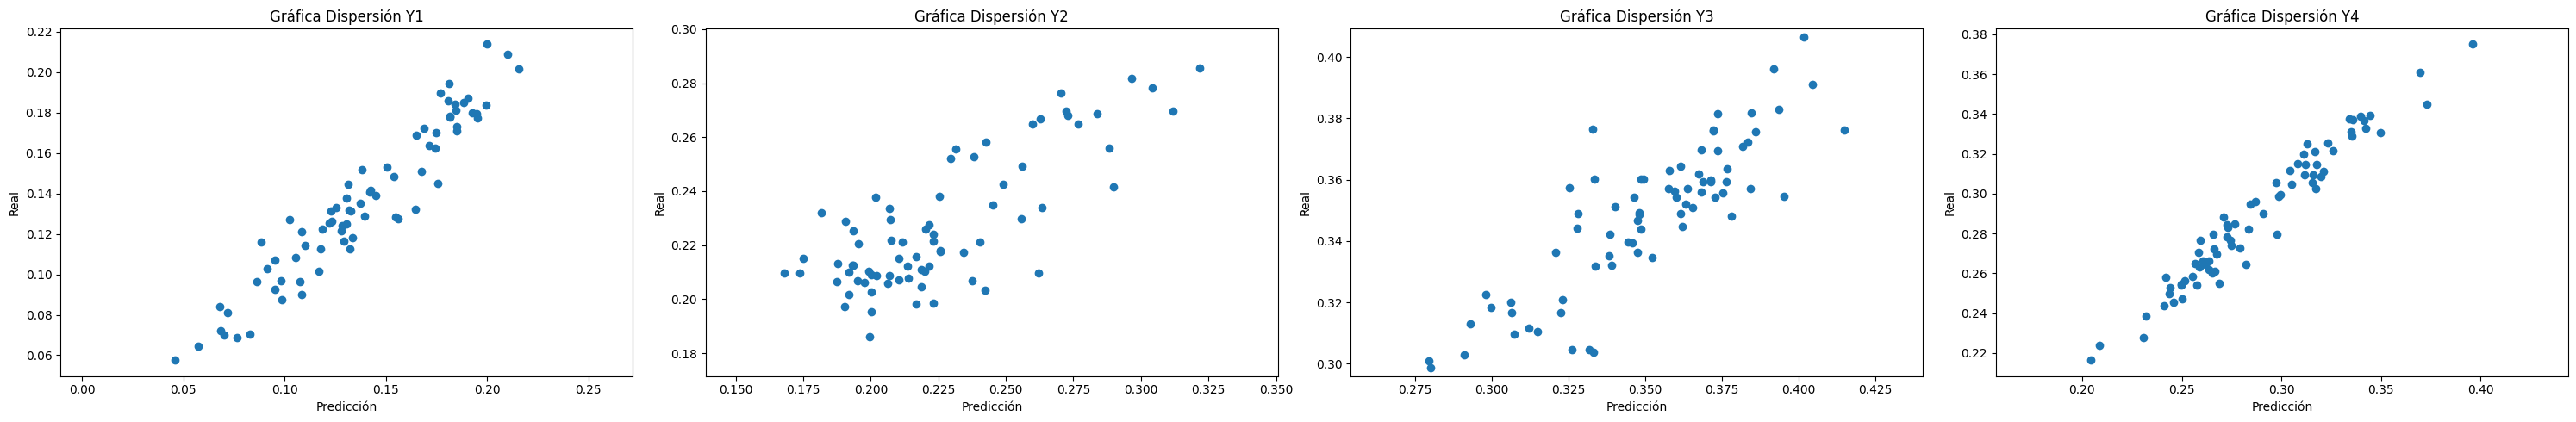

In [ ]:
pred_df = pd.DataFrame(y_pred_normalized)
test_df = pd.DataFrame(y_test_dfs_SVR[2])
pred_df.columns = test_df.columns

# Crear una figura y un conjunto de subgráficos
fig, axs = plt.subplots(1, 4, figsize=(30, 5))

# Iterar sobre las columnas y crear scatter plots
for i in range(4):
    ax = axs[i]
    ax.scatter(test_df.iloc[:, i], pred_df.iloc[:, i])
    ax.set_xlabel(f'Predicción')
    ax.set_ylabel(f'Real')
    ax.set_title(f'Gráfica Dispersión Y{i + 1}')
    ax.axis('equal')
# Ajustar el layout
plt.tight_layout()
plt.axis('equal')
# Mostrar los gráficos
plt.show()

In [ ]:
variables = test_df.columns

# Inicializar un diccionario para almacenar las métricas
metrics = {'MAE': [], 'MSE': [], 'R2': []}

for var in variables:
    y_test = test_df[var]
    y_pred_normalized = pred_df[var]

    mae = mean_absolute_error(y_test, y_pred_normalized)
    mse = mean_squared_error(y_test, y_pred_normalized)
    r2 = r2_score(y_test, y_pred_normalized)

    metrics['MAE'].append(mae)
    metrics['MSE'].append(mse)
    metrics['R2'].append(r2)

metrics_df = pd.DataFrame(metrics)
metrics_df.index = ['Y1', 'Y2', 'Y3', 'Y4']

# Mostrar el DataFrame con formato
metrics_df = metrics_df.style.set_caption("Errores de las variables objetivo").set_table_styles(
    [{'selector': 'caption',
      'props': [('font-size', '16px'), ('font-weight', 'bold')]}])

display(metrics_df)

,MAE,MSE,R2
Y1,0.009821,0.000154,0.908221
Y2,0.017088,0.000469,0.609950
Y3,0.012360,0.000251,0.722889
Y4,0.007359,0.000087,0.941704
